In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
calorie_data=pd.read_csv('C:/Users/palak/Downloads/calories.csv')

In [4]:
excercise_data=pd.read_csv('C:/Users/palak/Downloads/exercise.csv')

In [5]:
df = pd.merge(calorie_data, excercise_data, how='inner', on='User_ID')

In [6]:
df.head()

,User_ID,Calories,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,231.0,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,66.0,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,26.0,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,71.0,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,35.0,female,27,154.0,58.0,10.0,81.0,39.8


In [7]:
df.head(10)

,User_ID,Calories,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,231.0,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,66.0,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,26.0,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,71.0,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,35.0,female,27,154.0,58.0,10.0,81.0,39.8
5,15130815,123.0,female,36,151.0,50.0,23.0,96.0,40.7
6,19602372,112.0,female,33,158.0,56.0,22.0,95.0,40.5
7,11117088,143.0,male,41,175.0,85.0,25.0,100.0,40.7
8,12132339,134.0,male,60,186.0,94.0,21.0,97.0,40.4
9,17964668,72.0,female,26,146.0,51.0,16.0,90.0,40.2


In [8]:
df.describe()

,User_ID,Calories,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,89.539533,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453
std,2.872851e+06,62.456978,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230
min,1.000116e+07,1.000000,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000
25%,1.247419e+07,35.000000,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000
50%,1.499728e+07,79.000000,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000
75%,1.744928e+07,138.000000,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000
max,1.999965e+07,314.000000,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000


In [9]:
df.isnull().sum().sort_values(ascending=False) / df.shape[0] * 100

User_ID       0.0
Calories      0.0
Gender        0.0
Age           0.0
Height        0.0
Weight        0.0
Duration      0.0
Heart_Rate    0.0
Body_Temp     0.0
dtype: float64

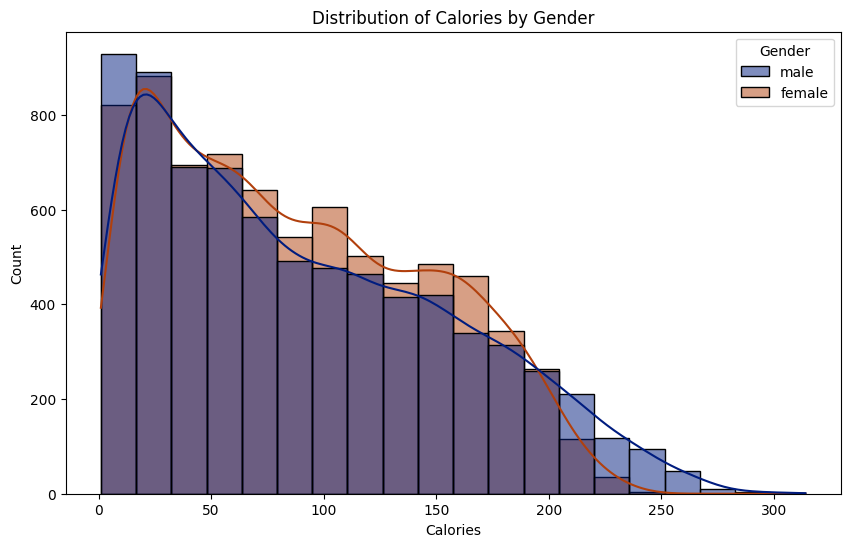

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(df,x='Calories', hue='Gender', bins=20, kde=True, palette='dark') 
plt.title('Distribution of Calories by Gender')
plt.xlabel('Calories')
plt.ylabel('Count')
plt.show()

In [11]:
df.drop(columns=['User_ID', 'Body_Temp', 'Heart_Rate'], inplace=True)

In [12]:
df.head()

,Calories,Gender,Age,Height,Weight,Duration
0,231.0,male,68,190.0,94.0,29.0
1,66.0,female,20,166.0,60.0,14.0
2,26.0,male,69,179.0,79.0,5.0
3,71.0,female,34,179.0,71.0,13.0
4,35.0,female,27,154.0,58.0,10.0


In [13]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Apply label encoding to the 'Gender' column
df['Gender'] = le.fit_transform(df['Gender'])
df.head()

,Calories,Gender,Age,Height,Weight,Duration
0,231.0,1,68,190.0,94.0,29.0
1,66.0,0,20,166.0,60.0,14.0
2,26.0,1,69,179.0,79.0,5.0
3,71.0,0,34,179.0,71.0,13.0
4,35.0,0,27,154.0,58.0,10.0


In [14]:
from sklearn.model_selection import train_test_split
X= df.drop(columns=['Calories'])
y= df['Calories']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
# Adding polynomial features to improve the model


poly_high = PolynomialFeatures(degree=3)
X_train_poly_high = poly_high.fit_transform(X_train)
X_test_poly_high = poly_high.transform(X_test)

# Re-fitting the model with higher-degree polynomial features
model_poly_high = LinearRegression()
model_poly_high.fit(X_train_poly_high, y_train)
y_pred_poly_high = model_poly_high.predict(X_test_poly_high)

# Recalculating the error
mse_poly_high = mean_squared_error(y_test, y_pred_poly_high)
r2_poly_high = r2_score(y_test, y_pred_poly_high)
print(f'Higher-Degree Polynomial Mean Squared Error: {mse_poly_high}')
print(f'Higher-Degree Polynomial R-squared: {r2_poly_high}')

# poly_high_4 = PolynomialFeatures(degree=4)
# X_train_poly_high_4 = poly_high.fit_transform(X_train)
# X_test_poly_high_4 = poly_high.transform(X_test)

# # Re-fitting the model with higher-degree polynomial features
# model_poly_high_4 = LinearRegression()
# model_poly_high_4.fit(X_train_poly_high, y_train)
# y_pred_poly_high_4 = model_poly_high.predict(X_test_poly_high)

# # Recalculating the error
# mse_poly_high_4 = mean_squared_error(y_test, y_pred_poly_high_4)
# r2_poly_high_4 = r2_score(y_test, y_pred_poly_high_4)
# print(f'Higher-Degree Polynomial Mean Squared Error: {mse_poly_high_4}')
# print(f'Higher-Degree Polynomial R-squared: {r2_poly_high_4}')

Mean Squared Error: 265.7478833140547
R-squared: 0.9341522264451461
Higher-Degree Polynomial Mean Squared Error: 135.63319965323413
Higher-Degree Polynomial R-squared: 0.966392416353767


In [20]:
# Correcting the input format for prediction
input_data = [[0, 20, 160, 81, 35]]  # Input as a 2D array
prediction = model_poly_high.predict(poly_high.transform(input_data))
print(prediction)


[196.06391989]


C:\Users\palak\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


In [15]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Experimenting with hyperparameter tuning for Random Forest
rf_model_tuned = RandomForestRegressor(n_estimators=250, max_depth=25, min_samples_split=12, random_state=42)

# Fit the tuned model on the training data
rf_model_tuned.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rf_tuned = rf_model_tuned.predict(X_test)

# Evaluate the tuned model
mse_rf_tuned = mean_squared_error(y_test, y_pred_rf_tuned)
r2_rf_tuned = r2_score(y_test, y_pred_rf_tuned)

print(f'Tuned Random Forest Mean Squared Error: {mse_rf_tuned}')
print(f'Tuned Random Forest R-squared: {r2_rf_tuned}')

Tuned Random Forest Mean Squared Error: 149.87925886561814
Tuned Random Forest R-squared: 0.9628624868981954


In [16]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and fit the SVR model
model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 454.3231202991538
R-squared: 0.8874265127792604


In [18]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and fit the K-Nearest Neighbors model
model = KNeighborsRegressor(n_neighbors=5)  # You can adjust n_neighbors as needed
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 195.76998666666668
R-squared: 0.951491550600126
